In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
sys.path.append('../')
from functions.box_model import Model, dYdt

### a simple 1-box model
- reservoir 0: external (default, assumed to have infinite mass)

- reservoir 1: Ocean

In [2]:
# define sub_functions to calculate flux
# parameters should be (model, t, record)

# reservoir 0 --> reservoir 1
def calc_input(model, t, record):
    fin = 1.0
    # additional input during 1000 <= t <= 2000
    if all([1000 <= t, t < 2000]):
        fin += 0.5
    if record:
        model.fluxes['00_01']['hist'].append([t, fin])   
    return(fin) 

# reservoir 1 --> reservoir 0
def calc_output(model, t, record):
    m = model.masses[1]
    fout = m * 0.001 # assumption: outflux is proportional to mass in Ocean
    # smaller than m
    fout = min(m, fout)
    if record:
        model.fluxes['01_00']['hist'].append([t, fout])   
    return(fout)

In [3]:
# constant parameters
M0_ocean = 1000 # Initial mass

In [4]:
# describe model
M = Model('one-box-model', unit_mass = 'Mt', unit_time = 'yr')
M.add_reservoir(1, 'Ocean', M0 = M0_ocean)
M.add_flux(res_no_from = 0, res_no_to = 1, func = calc_input, name = 'F_in')
M.add_flux(res_no_from = 1, res_no_to = 0, func = calc_output, name = 'F_out')

saved: ../charts/one-box-model.png


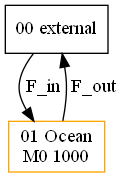

In [5]:
# visualize model
M.visualize_model()
Image(f"../charts/{M.name}.png")

10000 / 10000 calculated


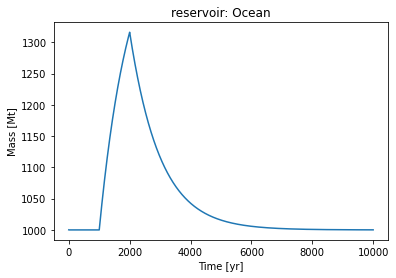

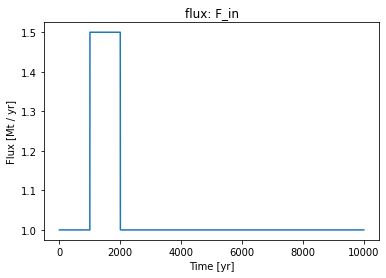

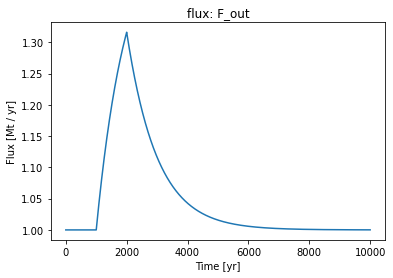

In [6]:
M.run(t_init = 0, t_end = 10000, t_step = 1)
M.visualize_masses()
M.visualize_fluxes()